In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

# Limpieza

In [2]:
df1 = pd.read_csv('data/ventas.csv', delimiter=';')
df1.head()

,pies,precio_venta,precio_costo,fecha,numero_doc,estado,motivo,punto,total_doc,descripcion_larga
0,5.3,1.6,1.2,2011-07-14 00:00:00.000,1,1,V,1,40.2,MADERA CATAHUA
1,7.0,1.6,1.2,2011-07-14 00:00:00.000,1,1,V,1,40.2,MADERA CATAHUA
2,6.0,1.6,1.2,2011-07-14 00:00:00.000,1,1,V,1,40.2,MADERA CATAHUA
3,5.3,1.6,1.2,2011-07-14 00:00:00.000,1,1,V,1,40.2,MADERA CATAHUA
4,1.5,1.6,1.2,2011-07-14 00:00:00.000,1,1,V,1,40.2,MADERA CATAHUA


In [3]:
df1['importe'] = df1['pies'] * df1['precio_venta']
df1.head()

,pies,precio_venta,precio_costo,fecha,numero_doc,estado,motivo,punto,total_doc,descripcion_larga,importe
0,5.3,1.6,1.2,2011-07-14 00:00:00.000,1,1,V,1,40.2,MADERA CATAHUA,8.48
1,7.0,1.6,1.2,2011-07-14 00:00:00.000,1,1,V,1,40.2,MADERA CATAHUA,11.20
2,6.0,1.6,1.2,2011-07-14 00:00:00.000,1,1,V,1,40.2,MADERA CATAHUA,9.60
3,5.3,1.6,1.2,2011-07-14 00:00:00.000,1,1,V,1,40.2,MADERA CATAHUA,8.48
4,1.5,1.6,1.2,2011-07-14 00:00:00.000,1,1,V,1,40.2,MADERA CATAHUA,2.40


In [4]:
# Ver el formato de cada columna
print(df1.dtypes)

pies                 float64
precio_venta         float64
precio_costo         float64
fecha                 object
numero_doc             int64
estado                 int64
motivo                object
punto                  int64
total_doc            float64
descripcion_larga     object
importe              float64
dtype: object


In [5]:
# Dar formato de fecha a la comulna de fecha
df1['fecha'] = pd.to_datetime(df1['fecha'])

In [6]:
# Ver valores NaN
cantidad_nan_por_columnas = df1.isna().sum(axis=0)

print("Cantidad de valores NaN por columnas:")
print(cantidad_nan_por_columnas)


Cantidad de valores NaN por columnas:
pies                  0
precio_venta          0
precio_costo          1
fecha                 0
numero_doc            0
estado                0
motivo                0
punto                 0
total_doc             0
descripcion_larga    27
importe               0
dtype: int64


In [7]:
df1 = df1.dropna()

In [8]:
# Verificar si la carpeta existe, si no, crearla :) 
carpeta = "visualisaciones"
if not os.path.exists(carpeta):
    os.makedirs(carpeta)

# Agrupar el importe por fecha $$
df_suma_importe1 = df1.groupby("fecha")["importe"].sum().reset_index()

# Gráfico de líneas
fig2 = px.line(df_suma_importe1, x="fecha", y="importe", title="Evolución de las ventas")

# Guardar el gráfico en un archivo HTML en la carpeta especificada 
ruta_grafico = os.path.join(carpeta, "grafico_importe1.html")
fig2.write_html(ruta_grafico)

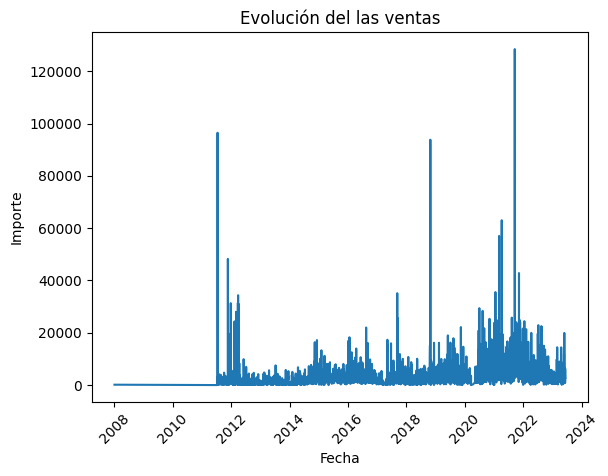

In [9]:
# Igual que antes XD 
# Crea el gráfico de líneas
plt.plot(df_suma_importe1['fecha'], df_suma_importe1['importe'])
plt.xlabel('Fecha')
plt.ylabel('Importe')
plt.title('Evolución del las ventas')
plt.xticks(rotation=45)
plt.show()

In [10]:
# (son valores de prueba que no se borraron) ¿como lo se?  sera nuestro secreto ;)
valores_a_eliminar = [1, 3182, 3246, 2655, 2658, 2702, 2701, 2666]
df1 = df1[~df1['numero_doc'].isin(valores_a_eliminar)]


In [11]:
# Ventas del 2008???   
df_suma_importe1.head()

,fecha,importe
0,2008-01-01,154.48
1,2011-07-12,11.40
2,2011-07-13,653.78
3,2011-07-14,96475.00
4,2011-07-15,280.31


In [12]:
filtro_fecha = df1['fecha'] == '2008-01-01'
df_filtrado = df1[filtro_fecha]
df_filtrado

,pies,precio_venta,precio_costo,fecha,numero_doc,estado,motivo,punto,total_doc,descripcion_larga,importe
121283,60.0,1.9,1.85,2008-01-01,9357,1,V,1,154.5,CATAHUA 60,114.00
121284,18.4,2.2,1.40,2008-01-01,9357,1,V,1,154.5,CATAHUA 60,40.48


In [13]:
# Los eliminamos porque el registro inicia el 2011, son datos basura
df1 = df1.drop([121283, 121284]).reset_index(drop=True)

In [14]:
# Calcular el importe por fecha
df_suma_importe = df1.groupby("fecha")["importe"].sum().reset_index()

# Crear el gráfico de líneas
fig = px.line(df_suma_importe, x="fecha", y="importe", title="Evolución de la Suma del Importe")

# Guardar el gráfico en un archivo HTML
ruta_grafico = os.path.join(carpeta, "grafico_importe2.html")
fig.write_html(ruta_grafico)

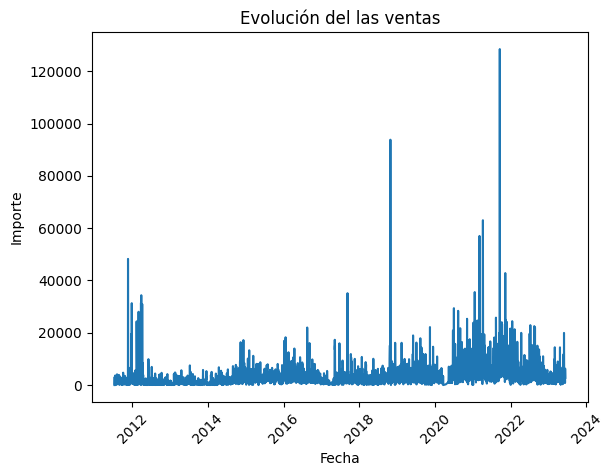

In [15]:
# Igual que antes XD 
# Crea el gráfico de líneas
plt.plot(df_suma_importe['fecha'], df_suma_importe['importe'])
plt.xlabel('Fecha')
plt.ylabel('Importe')
plt.title('Evolución del las ventas')
plt.xticks(rotation=45)
plt.show()

In [16]:
valores_unicos = df1['descripcion_larga'].unique()

# Imprime los valores únicos
print(valores_unicos)

[' MADERA CATAHUA ' '  CATAHUA HABILITADA CON MEDIDAS ESPECIALES'
 'CATAHUA  ANTIGUA' 'CATAHUA  ANT.' 'TORNILLO 127' 'COPAIBA 110'
 'CATAHUA 129' 'TRIPLAY NACIONAL DE CAPINURI  4 LINEAS 134' 'PINO 114'
 'TRIPLAY IMPORTADO FENOLICO  X 3 MM 164' 'CAPIRONA 101' 'RETAZOS VARIOS'
 'ASERRIN DE MADERA' 'A SACOS DE VIRUTA' 'SERVICIO DE HABILITACION'
 'TRIPLAY  IMPORTADO DE 4 LINEAS 161' 'CAPIRONA 112' 'CASHIMBO 113'
 'TRIPLAY BITANGOR DE 6 LINEAS' 'TRIPLAY IMPORTADO  X 3.5 MM 169'
 'TRIPLAY IMPORTADO DE 6 LINEAS 163' 'A ASACOS DE LEÑA' 'CAPIRONA'
 'MOHENA 154 ' 'TACOS DE MADERA ' 'CAPIRONA INVENTARIADA 156' 'MOHENA 118'
 'TRIPLAY NACIONAL  DE LUPUNA 4 LINEAS 128' 'CASHIMBO 73'
 'MADERA  MOHENA HABILITADA CON MEDIDAS ESPECIALES' 'RETAZERIA'
 'HUAYRURO 119' 'DESCARTE DE CATAHUA' 'CAJAS DE UVA' 'CAJAS DE TOMATE'
 'MOHENA  ' 'TRIPLAY 6 LINEAS  NACIONAL 135 '
 'COPAIBA INVENTARIADA NUEVA 145' 'ROBLE' 'MESAS PIRAÑAS TRIPLES'
 'AFILADO DE CINTA' 'CATAHUA 123' 'TRIPLAY  8 LINEAS NACIONAL 136'
 'MESAS 

In [17]:
# Se eliminan los productos que se descontinuaron por ser no rentables
valores_a_eliminar = [
    ' ATAUDES',' EFECTIVO Y/O MUEBLES','POR FACTURACION','ASERRIN DE MADERA','A SACOS DE VIRUTA','SERVICIO DE HABILITACION','A ASACOS DE LEÑA','AFILADO DE CINTA','RETAZOS VARIOS','ROLADA','DESCARTE DE CATAHUA',
    'TRIPLAY NACIONAL DE LUPUNA 4 LINEAS 128','CAJONES DE FRUTA','TRIPLAY 8 LINEAS NACIONAL 136','CAJAS DE UVA','TRIPLAY NACIONAL DE CAPINURI 4 LINEAS 134','TRIPLAY 6 LINEAS NACIONAL 135','RETAZERIA',
    'MESAS PIRAÑAS TRIPLES','MESAS PIRAÑAS DOBLES','MESAS SIMPLES','CAJAS DE TOMATE','TACOS DE MADERA','TRIPLAY IMPORTADO FENOLICO X 3 MM 164','TRIPLAY IMPORTADO DE 4 LINEAS 161','TRIPLAY BITANGOR DE 6 LINEAS',
    'TRIPLAY IMPORTADO X 3.5 MM 169','TRIPLAY IMPORTADO DE 6 LINEAS 163','MADERBA DE 12 LINEAS 176','MADERBA 18 LINEAS 177','MADERBA DE 15MM','TRIPLAY 6 LINEAS  NACIONAL 135 ', 'TACOS DE MADERA ','TRIPLAY LUPUNA 10MM 4 X 8',
    'TRUPAN','MDP DE 8MM X 6\' X 8\'','MDP 20MM X 1.17M X 2.44M','MDP DE 4MM X 1.22M X 2.1M','TABLAS DE 1 X 8 X 10','FENOLICO DE 18MM','TRIPLAY FENOLICO FILM 18MMX1.22MX2.44M','TRIPLAY  8 LINEAS NACIONAL 136',
    'TRIPLAY NACIONAL  DE LUPUNA 4 LINEAS 128','TRIPLAY NACIONAL DE CAPINURI  4 LINEAS 134','TRIPLAY IMPORTADO FENOLICO  X 3 MM 164','TRIPLAY  IMPORTADO DE 4 LINEAS 161','TRIPLAY IMPORTADO  X 3.5 MM 169'
]
df3 = df1[~df1['descripcion_larga'].isin(valores_a_eliminar)]

In [18]:
valores_unicos = df3['descripcion_larga'].unique()

# Imprime los valores únicos para ver si cambio la cosa
print(valores_unicos)

[' MADERA CATAHUA ' '  CATAHUA HABILITADA CON MEDIDAS ESPECIALES'
 'CATAHUA  ANTIGUA' 'CATAHUA  ANT.' 'TORNILLO 127' 'COPAIBA 110'
 'CATAHUA 129' 'PINO 114' 'CAPIRONA 101' 'CAPIRONA 112' 'CASHIMBO 113'
 'CAPIRONA' 'MOHENA 154 ' 'CAPIRONA INVENTARIADA 156' 'MOHENA 118'
 'CASHIMBO 73' 'MADERA  MOHENA HABILITADA CON MEDIDAS ESPECIALES'
 'HUAYRURO 119' 'MOHENA  ' 'COPAIBA INVENTARIADA NUEVA 145' 'ROBLE'
 'CATAHUA 123' 'PINO CORTO' 'COPAHIBA 66' 'CATAHUA 103 ' 'TORNILLO 111'
 '   TORNILLO MECANIZADO 91' 'CATAHUA 109' 'CATAHUA 117' 'TORNILLO 122'
 'COPAIBA N 102' 'CATAHUA  46' 'TORNILLO 107' 'CATAHUA 108' 'TORNILLO 94 '
 'TORNILLO N 98' 'CATAHUA N 106' 'COPAHIBA INV.100'
 ' TORNILLO COMERCIAL92' 'TORNILLO SECO 99' 'TORNILLO 104 N Y'
 'CATAHUA 86' 'CATAHUA 88' 'CATAHUA 95 INV' 'TORNILLO DE IQUITOS'
 'CATAHUA 85' 'CATAHUA 90' 'MOHENA 82' 'TORNILLO PTO BLANCO 81'
 'TORNILLO DE IQUITOS 62' 'CATAHUA 89' 'CATAHUA 84' 'CATAHUA 83 '
 'TORNILLO ESPECIAL HABILITADO CON MEDIDAS ESPECIALES'
 'TORNILLO  

In [19]:
df3

,pies,precio_venta,precio_costo,fecha,numero_doc,estado,motivo,punto,total_doc,descripcion_larga,importe
0,63.0,2.00,1.75,2011-07-14,2,1,V,1,835.6,MADERA CATAHUA,126.00
1,112.8,2.00,1.75,2011-07-14,2,1,V,1,835.6,MADERA CATAHUA,225.60
2,33.4,2.00,1.75,2011-07-14,2,1,V,1,835.6,MADERA CATAHUA,66.80
3,64.0,2.00,1.75,2011-07-14,2,1,V,1,835.6,MADERA CATAHUA,128.00
4,25.0,1.70,1.20,2011-07-14,2,1,V,1,835.6,MADERA CATAHUA,42.50
...,...,...,...,...,...,...,...,...,...,...,...
142692,12.0,7.80,5.20,2023-06-12,20493,1,V,1,313.2,TORNILLO 127,93.60
142693,10.7,6.50,4.20,2023-06-12,20493,1,V,1,313.2,TORNILLO 127,69.55
142694,20.0,7.50,5.20,2023-06-12,20493,1,V,1,313.2,TORNILLO 127,150.00
142695,201.0,4.73,0.00,2023-06-12,20492,1,V,1,2450.2,ALMENDRA,950.73


In [20]:
# Utiliza el método str.replace() con una expresión regular para eliminar el texto adicional 
df3.loc[:, 'descripcion_larga'] = df3['descripcion_larga'].str.replace(r'^.*?(CATAHUA).*?$', r'\1', regex=True)
df3.loc[:, 'descripcion_larga'] = df3['descripcion_larga'].str.replace(r'^.*?(CASHIMBO).*?$', r'\1', regex=True)
df3.loc[:, 'descripcion_larga'] = df3['descripcion_larga'].str.replace(r'^.*?(TORNILLO).*?$', r'\1', regex=True)
df3.loc[:, 'descripcion_larga'] = df3['descripcion_larga'].str.replace(r'^.*?(COPAIBA).*?$', r'\1', regex=True)
df3.loc[:, 'descripcion_larga'] = df3['descripcion_larga'].str.replace(r'^.*?(MOHENA).*?$', r'\1', regex=True)
df3.loc[:, 'descripcion_larga'] = df3['descripcion_larga'].str.replace(r'^.*?(PINO).*?$', r'\1', regex=True)
df3.loc[:, 'descripcion_larga'] = df3['descripcion_larga'].str.replace(r'^.*?(MARUPA).*?$', r'\1', regex=True)
df3.loc[:, 'descripcion_larga'] = df3['descripcion_larga'].str.replace(r'^.*?(COPAHIBA).*?$', r'\1', regex=True)
df3.loc[:, 'descripcion_larga'] = df3['descripcion_larga'].str.replace(r'^.*?(CAPIRONA).*?$', r'\1', regex=True)
df3.loc[:, 'descripcion_larga'] = df3['descripcion_larga'].str.replace(r'^.*?(HUAYRURO).*?$', r'\1', regex=True)
df3.loc[:, 'descripcion_larga'] = df3['descripcion_larga'].str.replace(r'^.*?(CUMALA).*?$', r'\1', regex=True)
df3.loc[:, 'descripcion_larga'] = df3['descripcion_larga'].str.replace(r'^.*?(LUPUNA).*?$', r'\1', regex=True)
df3.loc[:, 'descripcion_larga'] = df3['descripcion_larga'].str.replace(r'^.*?(CIPRES).*?$', r'\1', regex=True)
df3.loc[:, 'descripcion_larga'] = df3['descripcion_larga'].str.replace('COPAHIBA', 'COPAIBA')


In [21]:
valores_unicos = df3['descripcion_larga'].unique()
# Imprime los valores únicos para ver si ya esta la cosas 
print(valores_unicos)

['CATAHUA' 'TORNILLO' 'COPAIBA' 'PINO' 'CAPIRONA' 'CASHIMBO' 'MOHENA'
 'HUAYRURO' 'ROBLE' 'CUMALA' 'CEDRO' 'LUPUNA' 'CAOBA' 'MARUPA' 'CIPRES'
 'ALMENDRA']


# Inicio de la exploracion 

In [55]:
ventas_totales = df3.loc[:,"importe"].sum()

df3.loc[:, 'año'] = df3['fecha'].dt.year
df3.loc[:, 'mes'] = df3['fecha'].dt.month
df3.loc[:, 'día'] = df3['fecha'].dt.day

promedio_ventas_dia = df3.groupby('día')['importe'].mean()
promedio_ventas_mes = df3.groupby('mes')['importe'].mean()
promedio_ventas_año = df3.groupby('año')['importe'].mean()

print("Promedio de ventas por día:\n", promedio_ventas_dia)
print("\nPromedio de ventas por mes:\n", promedio_ventas_mes)
print("\nPromedio de ventas por año:\n", promedio_ventas_año)



# Imprime el resultado de las ventas totales
print("Ventas totales: ", ventas_totales)

Promedio de ventas por día:
 día
1      92.969850
2      80.271202
3      80.665900
4      79.348144
5     103.333285
6      86.991789
7      93.338886
8      88.168260
9      93.962961
10     92.196081
11     99.965418
12     93.677884
13     83.805449
14     76.282486
15     90.799594
16     85.184781
17    104.021639
18     81.635550
19     86.815418
20     82.641774
21     78.610712
22     89.662091
23     85.679931
24     93.008707
25     74.930048
26     95.308102
27    106.903839
28     73.588666
29     79.857887
30     77.782428
31     86.700335
Name: importe, dtype: float64

Promedio de ventas por mes:
 mes
1     84.339553
2     84.508846
3     94.250941
4     91.992618
5     83.599465
6     79.387319
7     79.322869
8     87.177829
9     97.704750
10    96.985217
11    89.000906
12    86.468853
Name: importe, dtype: float64

Promedio de ventas por año:
 año
2011     48.046250
2012     52.027857
2013     49.104735
2014     61.666505
2015     65.672949
2016     68.209857
2017  

In [23]:
ventas_por_producto = df3.groupby('descripcion_larga')['importe'].sum()
productos_mas_vendidos = ventas_por_producto.sort_values(ascending=False)
print("Productos más vendidos:\n", productos_mas_vendidos)

Productos más vendidos:
 descripcion_larga
CATAHUA     4405323.497
TORNILLO    4120486.328
PINO        1503980.311
COPAIBA     1417995.373
MOHENA       280076.420
CAPIRONA     101424.580
CEDRO         81605.245
LUPUNA        45813.443
CASHIMBO      41579.370
HUAYRURO      32655.099
CUMALA        25820.495
CAOBA         20980.550
ALMENDRA       5665.388
MARUPA         1905.686
ROBLE           711.760
CIPRES          303.600
Name: importe, dtype: float64


In [24]:
ventas_por_catidad_de_producto = df3.groupby('descripcion_larga')['pies'].sum()
productos_mas_vendidos = ventas_por_catidad_de_producto.sort_values(ascending=False)
print("Productos más vendidos:\n", productos_mas_vendidos)

Productos más vendidos:
 descripcion_larga
CATAHUA     2022422.70
TORNILLO     750696.67
PINO         419741.30
COPAIBA      401197.31
MOHENA        43208.20
CAPIRONA      27795.20
LUPUNA        11751.40
CASHIMBO       9674.90
CEDRO          7292.30
CUMALA         6807.60
HUAYRURO       6120.20
CAOBA          1517.10
ALMENDRA       1276.90
MARUPA          383.80
ROBLE           196.70
CIPRES           75.90
Name: pies, dtype: float64


<Axes: title={'center': 'Tendencia de Ventas'}, xlabel='Fecha', ylabel='Ventas'>

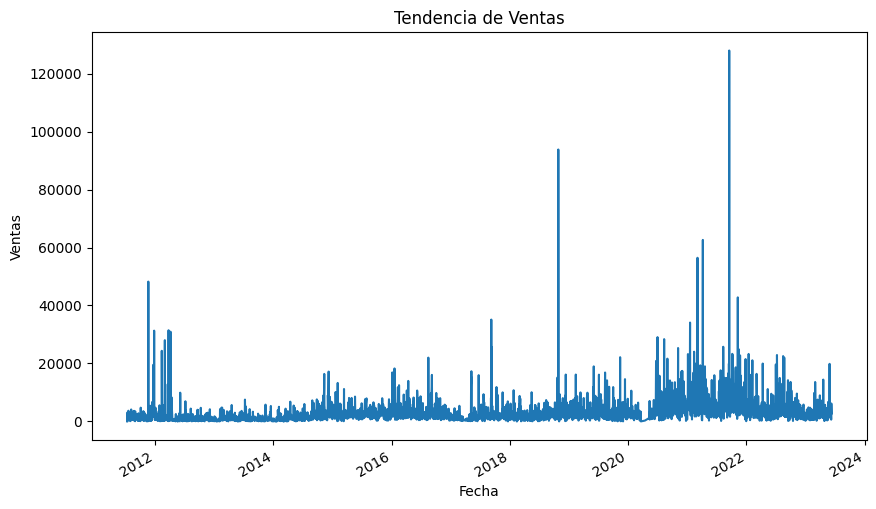

In [25]:
ventas_por_fecha = df3.groupby('fecha')['importe'].sum()  # Suma de las ventas diarias

# Crear el gráfico de líneas
ventas_por_fecha.plot(kind='line', figsize=(10, 6), xlabel='Fecha', ylabel='Ventas', title='Tendencia de Ventas')

<Axes: title={'center': 'Ventas Mensuales'}, xlabel='Mes', ylabel='Ventas'>

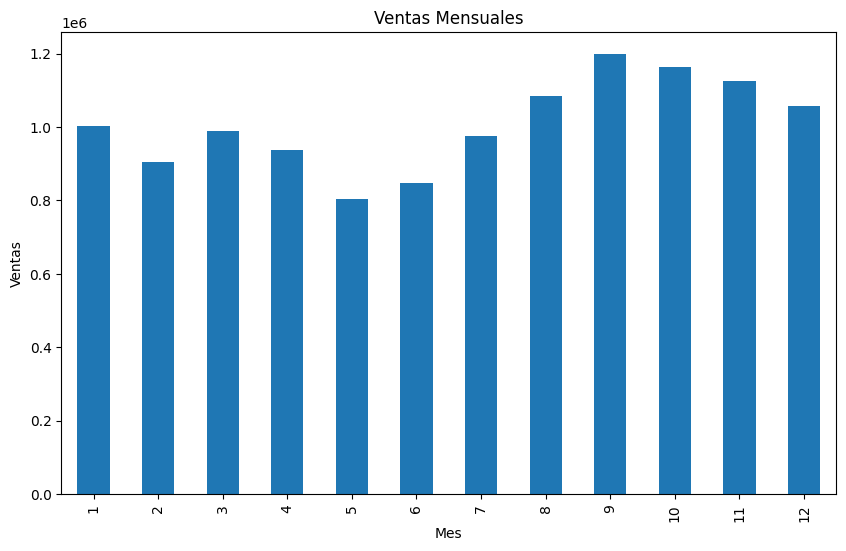

In [26]:
ventas_por_mes = df3.groupby(df3['fecha'].dt.month)['importe'].sum()  # Suma de las ventas por mes
ventas_por_año = df3.groupby(df3['fecha'].dt.year)['importe'].sum()  # Suma de las ventas por año

# Crear el gráfico de barras para las ventas mensuales
ventas_por_mes.plot(kind='bar', figsize=(10, 6), xlabel='Mes', ylabel='Ventas', title='Ventas Mensuales')

<Axes: title={'center': 'PT Mensuales'}, xlabel='Mes', ylabel='Ventas'>

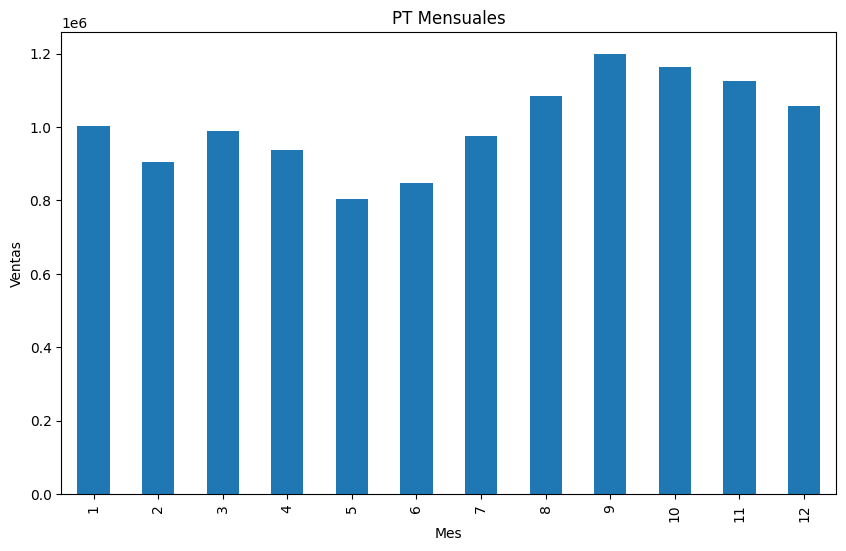

In [27]:
PT_por_mes = df3.groupby(df3['fecha'].dt.month)['pies'].sum()  # Suma de las ventas por mes
PT_por_año = df3.groupby(df3['fecha'].dt.year)['pies'].sum()  # Suma de las ventas por año

# Crear el gráfico de barras para los pies tablares vendidos
ventas_por_mes.plot(kind='bar', figsize=(10, 6), xlabel='Mes', ylabel='Ventas', title='PT Mensuales')

<Axes: title={'center': 'PT Anuales'}, xlabel='Año', ylabel='Ventas'>

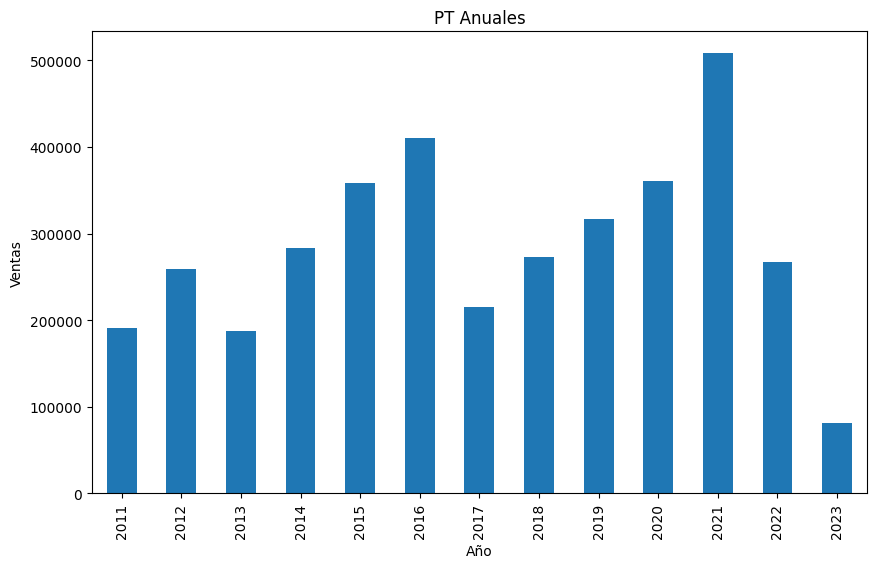

In [28]:
# Crear el gráfico de barras para los pies tablares  anuales
PT_por_año.plot(kind='bar', figsize=(10, 6), xlabel='Año', ylabel='Ventas', title='PT Anuales')

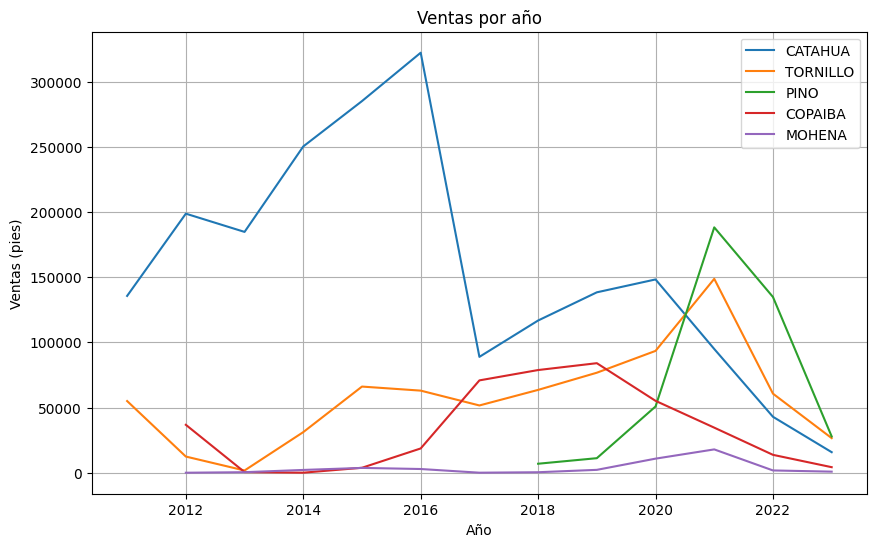

In [29]:
# Filtrar el DataFrame por especie de madera
catahua_df3 = df3[df3['descripcion_larga'] == 'CATAHUA']
tornillo_df3 = df3[df3['descripcion_larga'] == 'TORNILLO']
pino_df3 = df3[df3['descripcion_larga'] == 'PINO']
copaiba_df3 = df3[df3['descripcion_larga'] == 'COPAIBA']
mohena_df3 = df3[df3['descripcion_larga'] == 'MOHENA']

# Agrupar los datos por año y sumar los valores de 'pies'
catahua_ventas_por_anio = catahua_df3.groupby(catahua_df3['fecha'].dt.year)['pies'].sum()
tornillo_ventas_por_anio = tornillo_df3.groupby(tornillo_df3['fecha'].dt.year)['pies'].sum()
pino_ventas_por_anio = pino_df3.groupby(pino_df3['fecha'].dt.year)['pies'].sum()
copaiba_ventas_por_anio = copaiba_df3.groupby(copaiba_df3['fecha'].dt.year)['pies'].sum()
mohena_ventas_por_anio = mohena_df3.groupby(mohena_df3['fecha'].dt.year)['pies'].sum()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(catahua_ventas_por_anio.index, catahua_ventas_por_anio.values, label='CATAHUA')
plt.plot(tornillo_ventas_por_anio.index, tornillo_ventas_por_anio.values, label='TORNILLO')
plt.plot(pino_ventas_por_anio.index, pino_ventas_por_anio.values, label='PINO')
plt.plot(copaiba_ventas_por_anio.index, copaiba_ventas_por_anio.values, label='COPAIBA')
plt.plot(mohena_ventas_por_anio.index, mohena_ventas_por_anio.values, label='MOHENA')
plt.xlabel('Año')
plt.ylabel('Ventas (pies)')
plt.title('Ventas por año')
plt.legend()

plt.grid()
plt.show()

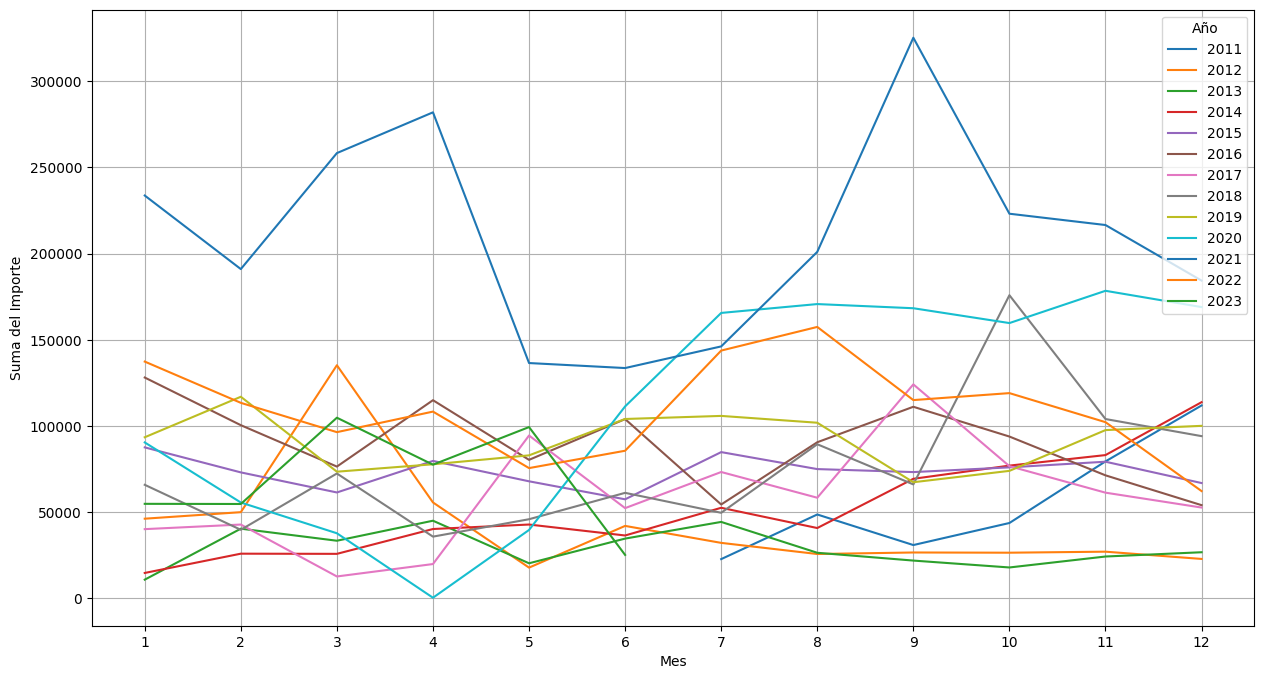

In [30]:

# Agrupar por año y mes, y sumar el importe
df_grouped = df3.groupby(['año', 'mes'])['importe'].sum().reset_index()

# Crear el gráfico
fig, ax = plt.subplots(figsize=(15, 8))  # Ajusta el tamaño a tus preferencias
for year in df_grouped['año'].unique():
    df_year = df_grouped[df_grouped['año'] == year]
    ax.plot(df_year['mes'], df_year['importe'], label=str(year))

ax.set_xlabel('Mes')
ax.set_ylabel('Suma del Importe')
ax.set_xticks(df_grouped['mes'].unique())
ax.legend(title='Año')
ax.legend(title='Año', loc='upper right')  # Mover la leyenda a la esquina derecha

plt.grid()
plt.show()

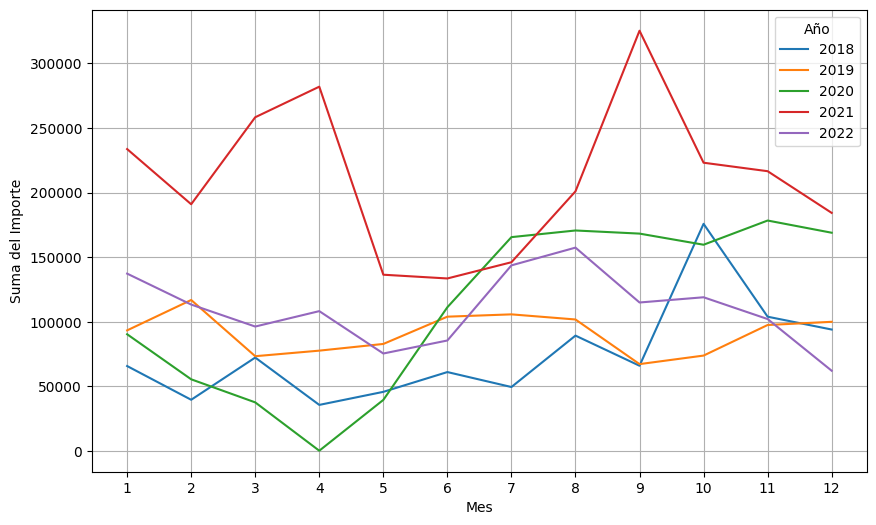

In [31]:
# Filtrar los datos 
years_to_plot = [2018, 2019, 2020, 2021, 2022]
df_filtered = df_grouped[df_grouped['año'].isin(years_to_plot)]

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
for year in df_filtered['año'].unique():
    df_year = df_filtered[df_filtered['año'] == year]
    ax.plot(df_year['mes'], df_year['importe'], label=str(year))

ax.set_xlabel('Mes')
ax.set_ylabel('Suma del Importe')
ax.set_xticks(df_grouped['mes'].unique())
ax.legend(title='Año')

plt.grid()
plt.show()

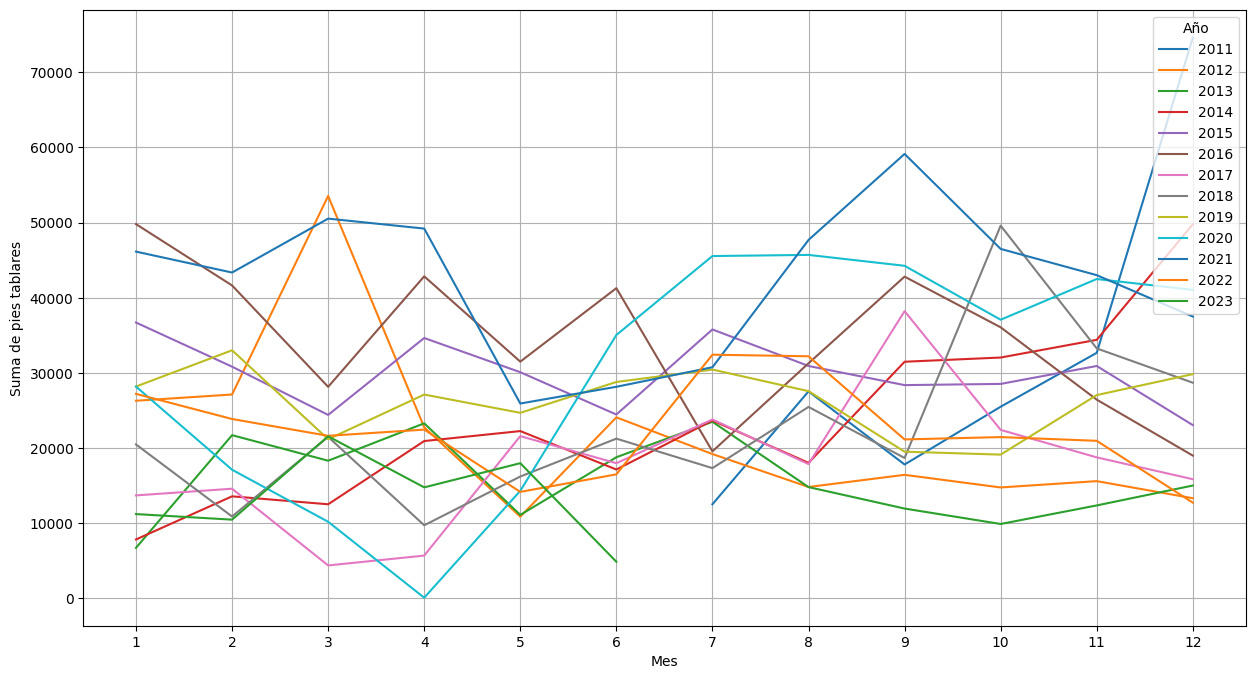

In [32]:
# Agrupar por año y mes, y sumar el pies
df_grouped = df3.groupby(['año', 'mes'])['pies'].sum().reset_index()

# Crear el gráfico
fig, ax = plt.subplots(figsize=(15, 8))  # Ajusta el tamaño a tus preferencias
for year in df_grouped['año'].unique():
    df_year = df_grouped[df_grouped['año'] == year]
    ax.plot(df_year['mes'], df_year['pies'], label=str(year))

ax.set_xlabel('Mes')
ax.set_ylabel('Suma de pies tablares')
ax.set_xticks(df_grouped['mes'].unique())
ax.legend(title='Año')
ax.legend(title='Año', loc='upper right')  # Mover la leyenda a la esquina derecha

plt.grid()
plt.show()

In [33]:
df3

,pies,precio_venta,precio_costo,fecha,numero_doc,estado,motivo,punto,total_doc,descripcion_larga,importe,año,mes,día
0,63.0,2.00,1.75,2011-07-14,2,1,V,1,835.6,CATAHUA,126.00,2011,7,14
1,112.8,2.00,1.75,2011-07-14,2,1,V,1,835.6,CATAHUA,225.60,2011,7,14
2,33.4,2.00,1.75,2011-07-14,2,1,V,1,835.6,CATAHUA,66.80,2011,7,14
3,64.0,2.00,1.75,2011-07-14,2,1,V,1,835.6,CATAHUA,128.00,2011,7,14
4,25.0,1.70,1.20,2011-07-14,2,1,V,1,835.6,CATAHUA,42.50,2011,7,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142692,12.0,7.80,5.20,2023-06-12,20493,1,V,1,313.2,TORNILLO,93.60,2023,6,12
142693,10.7,6.50,4.20,2023-06-12,20493,1,V,1,313.2,TORNILLO,69.55,2023,6,12
142694,20.0,7.50,5.20,2023-06-12,20493,1,V,1,313.2,TORNILLO,150.00,2023,6,12
142695,201.0,4.73,0.00,2023-06-12,20492,1,V,1,2450.2,ALMENDRA,950.73,2023,6,12


In [45]:

# Calcular la suma del importe por año
df3_suma_importe = df3.groupby('año')['importe'].sum().reset_index()

# Crear la gráfica de barras
fig = px.bar(df3_suma_importe, x='año', y='importe', title='Suma del Importe por año')

# Mostrar la gráfica
fig.show()

In [44]:
# Calcular la suma de pies por año
df3_suma_importe = df3.groupby('año')['pies'].sum().reset_index()

# Crear la gráfica de barras
fig = px.bar(df3_suma_importe, x='año', y='pies', title='Venta de pies tablares por año')

# Mostrar la gráfica
fig.show()

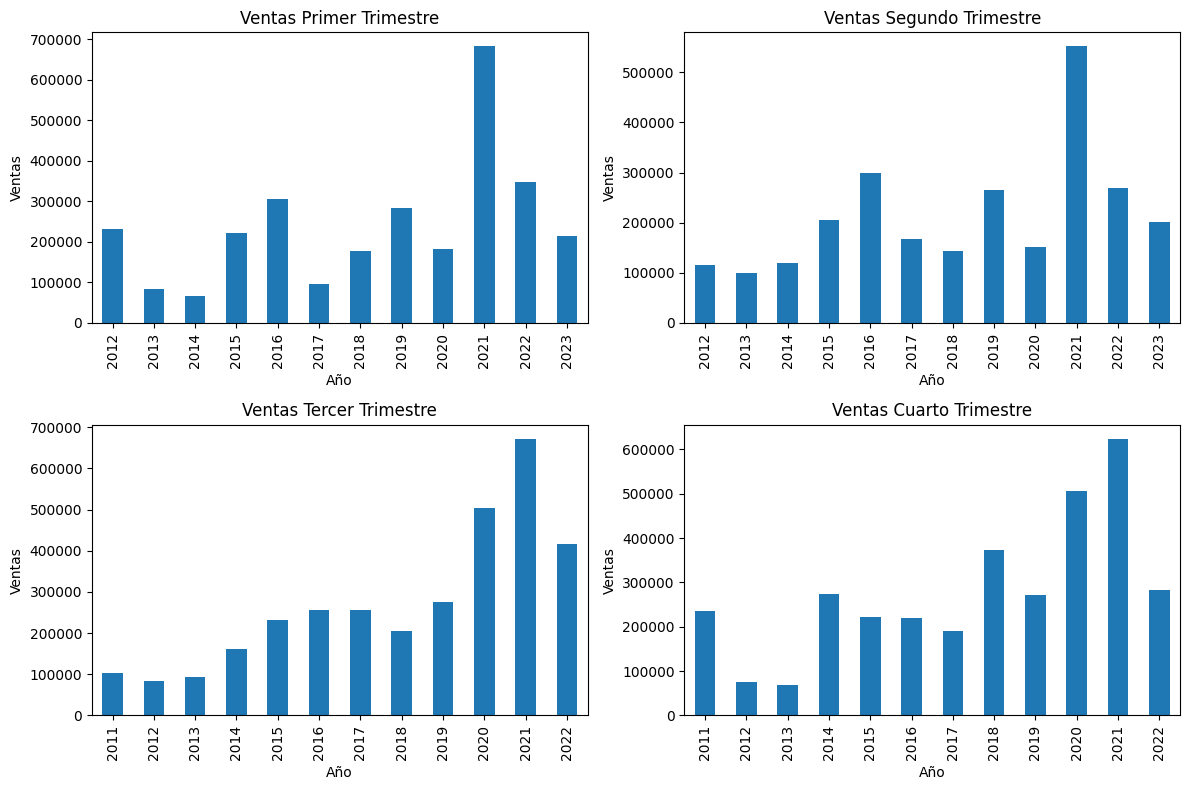

In [47]:
# Crear columnas para el trimestre y año
df3.loc[:, 'Trimestre'] = df3['fecha'].dt.quarter
df3.loc[:,'Año'] = df3['fecha'].dt.year

# Filtrar el dataframe por trimestre y año
primer_trimestre = df3[(df3['Trimestre'] == 1)]
segundo_trimestre = df3[(df3['Trimestre'] == 2)]
tercer_trimestre = df3[(df3['Trimestre'] == 3)]
cuarto_trimestre = df3[(df3['Trimestre'] == 4)]

# Calcular las ventas totales por trimestre y año
ventas_primer_trimestre = primer_trimestre.groupby('Año')['importe'].sum()
ventas_segundo_trimestre = segundo_trimestre.groupby('Año')['importe'].sum()
ventas_tercer_trimestre = tercer_trimestre.groupby('Año')['importe'].sum()
ventas_cuarto_trimestre = cuarto_trimestre.groupby('Año')['importe'].sum()

# Graficar las ventas por trimestre y año
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
ventas_primer_trimestre.plot(kind='bar', title='Ventas Primer Trimestre', xlabel='Año', ylabel='Ventas')

plt.subplot(2, 2, 2)
ventas_segundo_trimestre.plot(kind='bar', title='Ventas Segundo Trimestre', xlabel='Año', ylabel='Ventas')

plt.subplot(2, 2, 3)
ventas_tercer_trimestre.plot(kind='bar', title='Ventas Tercer Trimestre', xlabel='Año', ylabel='Ventas')

plt.subplot(2, 2, 4)
ventas_cuarto_trimestre.plot(kind='bar', title='Ventas Cuarto Trimestre', xlabel='Año', ylabel='Ventas')

plt.tight_layout()
plt.show()


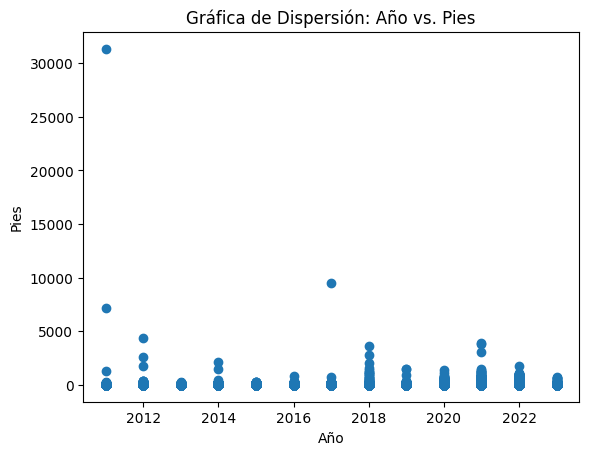

In [48]:
# Crear la gráfica de dispersión
plt.scatter(df3['Año'], df3['pies'])

# Configurar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Pies')
plt.title('Gráfica de Dispersión: Año vs. Pies')

# Mostrar la gráfica
plt.show()

quienes fueron los outlier y que les paso?

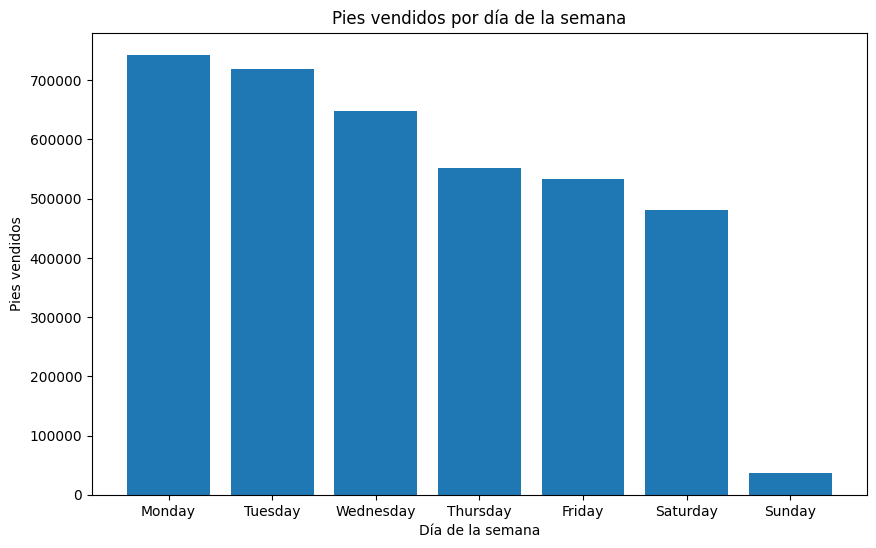

In [51]:
# Obtener el nombre del día de la semana a partir de la columna 'fecha'
df3.loc[:, 'nombre_dia'] = df3['fecha'].dt.day_name()

# Agrupar por el nombre del día de la semana y calcular la suma de 'pies' vendidos
df3_grouped = df3.groupby('nombre_dia')['pies'].sum().reset_index()

# Ordenar los datos de mayor a menor según la suma de 'pies' vendidos
df3_grouped = df3_grouped.sort_values(by='pies', ascending=False)

# Crear una figura más grande
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras
plt.bar(df3_grouped['nombre_dia'], df3_grouped['pies'])

# Configurar etiquetas y título
plt.xlabel('Día de la semana')
plt.ylabel('Pies vendidos')
plt.title('Pies vendidos por día de la semana')

# Mostrar el gráfico
plt.show()

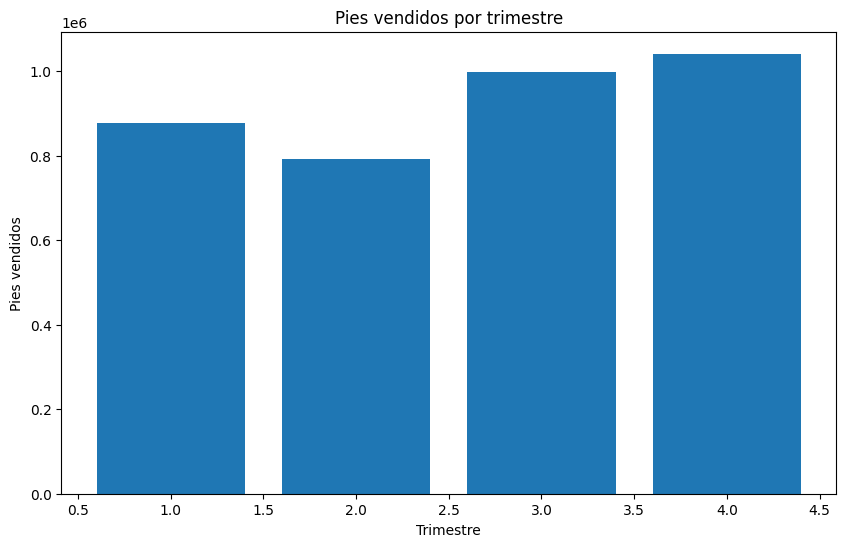

In [52]:
# Agrupar por trimestre y calcular la suma de 'pies' vendidos
df_grouped = df3.groupby('Trimestre')['pies'].sum().reset_index()

# Ordenar los trimestres según la suma de 'pies' vendidos
df_grouped = df_grouped.sort_values(by='pies', ascending=False)

# Crear una figura más grande
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras
plt.bar(df_grouped['Trimestre'], df_grouped['pies'])

# Configurar etiquetas y título
plt.xlabel('Trimestre')
plt.ylabel('Pies vendidos')
plt.title('Pies vendidos por trimestre')

# Mostrar el gráfico
plt.show()

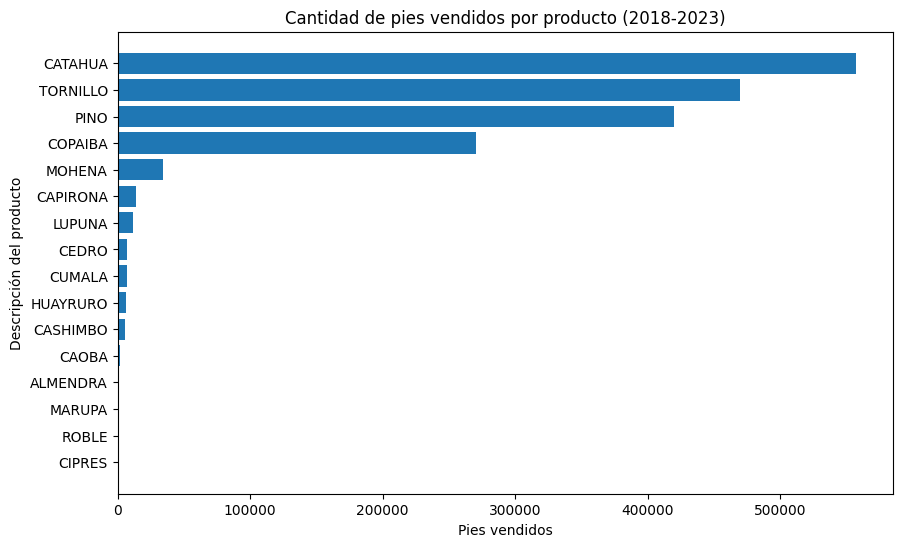

In [53]:
# Filtrar los datos para los años 2018 al 2023
df3_filtered = df3[(df3['año'] >= 2018) & (df3['año'] <= 2023)]

# Agrupar por descripción de producto y calcular la suma de "pies"
df3_grouped = df3_filtered.groupby('descripcion_larga')['pies'].sum().reset_index()

# Ordenar los productos según la suma de "pies" vendidos
df3_sorted = df3_grouped.sort_values(by='pies', ascending=True)

# Crear una figura
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras horizontales
plt.barh(df3_sorted['descripcion_larga'], df3_sorted['pies'])

# Configurar etiquetas y título
plt.xlabel('Pies vendidos')
plt.ylabel('Descripción del producto')
plt.title('Cantidad de pies vendidos por producto (2018-2023)')

# Mostrar el gráfico
plt.show()

In [54]:
# pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


FIN